In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import (datasets,model_selection as skms, neighbors, metrics as mt, linear_model as lm)
import sqlite3, pandas as pd

In [2]:
df = pd.read_csv('iris.csv',delimiter=',',encoding='latin-1')

In [3]:
df['variety'] = pd.factorize(df['variety'])[0]+1
print(df)


     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


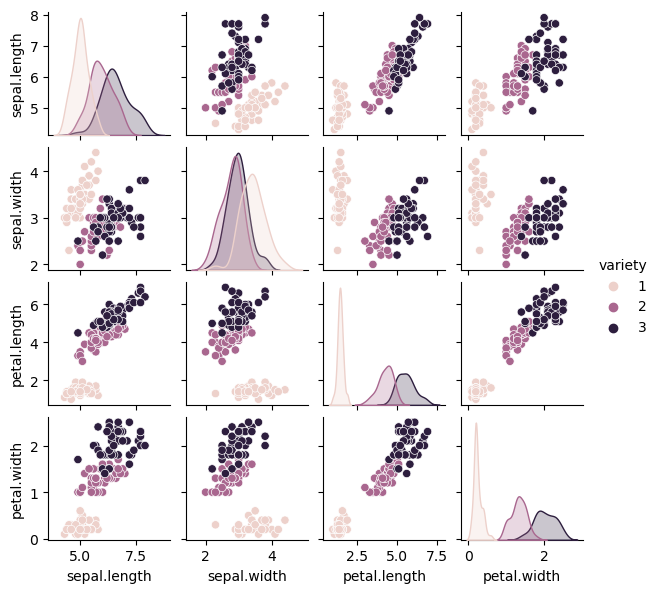

In [4]:
sns.pairplot(df,hue='variety',height=1.5)


In [5]:

x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values
print(y)
y= y.ravel()
y


[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
"""x_train,x_test,y_train,y_test = skms.train_test_split(x,y,test_size= .4, random_state=0)"""
x_train,x_test,y_train,y_test = skms.train_test_split(x,y,test_size= .8,stratify=y,random_state=0)

In [7]:
"""Pruebas"""
#clasificador knn
model = neighbors.KNeighborsClassifier()
#entrenamiento
model.fit(x_train,y_train)

#mandamos datos a predecir e imprimimos 

predicciones= model.predict(x_test)


j=mt.accuracy_score(predicciones,y_test)
i=mt.confusion_matrix(predicciones,y_test)



print(j)
print(i)




0.9416666666666667
[[40  0  0]
 [ 0 39  6]
 [ 0  1 34]]


<AxesSubplot: xlabel='petal.width', ylabel='sepal.length'>

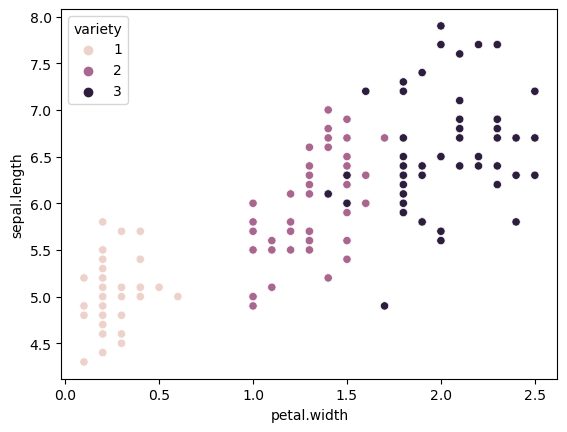

In [8]:
sns.scatterplot(data=df,x='petal.width',y='sepal.length',hue='variety')

<AxesSubplot: >

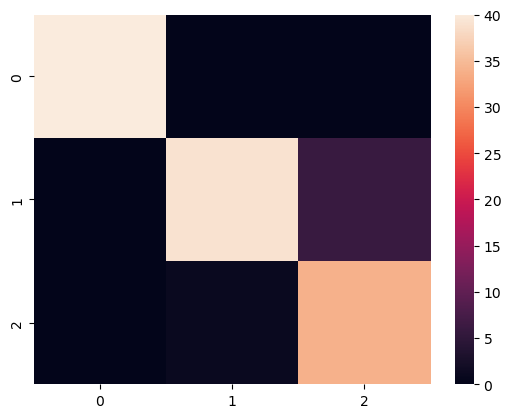

In [9]:
sns.heatmap(i)

In [15]:
"""Prueba modelo de regresión"""
#Linear regresión 
model = lm.LinearRegression().fit(x_train,y_train)
#entrenamiento


#mandamos datos a predecir e imprimimos 

predict = model.predict(x_test)
print(predict)

print(y_test)

mt.r2_score(y_test,predict)#tarea mejorar el porcentaje con un modelo de regresión(lineal, minimos cuadrados,arboles de decisiones)knn




[0.95557059 2.35950534 2.43611949 3.01971729 2.16745982 0.99217595
 0.87825727 2.26989449 2.39039911 2.10799755 2.75292607 0.90665714
 2.56753155 0.78108678 0.98314309 2.29275468 2.85443074 2.75105244
 3.01988075 3.12586943 1.02745532 2.1088719  2.12565861 0.98559
 1.05952123 2.94245634 2.09033225 2.26791305 2.23638517 2.14624052
 1.8550816  0.94332332 2.35041165 0.93697435 1.30887472 3.26350975
 2.50788024 2.76894624 0.89634528 0.93825335 0.94291867 1.93173946
 3.00309404 1.8563606  0.95352832 2.64995759 2.61702578 1.03695788
 2.42199109 1.06808438 2.03849891 2.07220571 3.20376353 1.9044638
 3.28323443 2.15154323 3.13560472 2.31186761 0.81332037 2.79583437
 2.70761456 2.0137256  2.83570112 2.55860227 0.93516482 1.08856271
 3.22200211 2.60356034 1.2486459  1.84645762 1.11001475 2.18535785
 2.04998291 2.38679811 0.95661685 0.91727101 1.13163869 0.99650072
 0.94204432 2.8002019  1.08110242 3.1163711  2.68960873 1.94754824
 2.31729948 3.22662796 2.62676108 0.90205687 2.10356919 0.9700823


0.9177113348256473